<a href="https://colab.research.google.com/github/LaraNegri/EntregasPDI/blob/main/TP7/Practico7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 7

Creado por: Lara Negri

## Descripción del práctico


Desarrollar un aplicativo que permita abrir una imagen y automáticamente convertirla a niveles de grises (en caso de no estarlo) y visualizarla. Con esta imagen se aplicarán los siguientes filtros morfológicos, los cuales deben poderse seleccionar de una lista:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (tomar el máximo valor de luminancia de la vecindad)
- Apertura
- Cierre
- Borde morfológico (frontera interna y externa)
- Mediana
- Top-hat

El elemento estructurante será de una ventana de 3x3 pixeles.
El aplicativo debe incluir una función de copiado de la imagen procesada, de tal manera que esta pueda tomarse como imagen de entrada para así poder aplicar dos o más filtros en secuencia.
El resultado del filtro debe poder guardarse como una nueva imagen en nivel de grises.
Adicionalmente se debe mostrar un plot con el resultado respectivo para cada uno de los filtros indicados.

## Librerias requeridas

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Funciones a utilizar

In [21]:
# Función para leer una imagen y tenerla como Array numpy sin limitación uint8
def get_image(rute):
  im = io.imread(rute)
  im = im.astype(np.int)
  return im
  
  # Obtener el canal R normalizado de una imagen
def get_R(im):
  R = im[:, :, 0]
  return R

  # Obtener el canal G normalizado de una imagen
def get_G(im):
  G = im[:, :, 1]
  return G

  # Obtener el canal B normalizado de una imagen
def get_B(im):
  B = im[:, :, 2]
  return B

def rgb_to_image(newR,newG,newB):
  Shape = newR.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = newR
  im_out[:,:,1] = newG
  im_out[:,:,2] = newB
  return im_out.astype(np.uint8)

## Filtros

In [22]:
def dilatacion(x, z, Y, im):
  Ydil = np.zeros((x,z))

  for i in range(x):
    for j in range(z):
      Ydil[i,j] = np.amax(np.array([[Y[i-1,j-1], Y[i-1,j], Y[i-1,j+1]],
                                    [Y[i,j-1], Y[i,j], Y[i,j+1]],
                                    [Y[i+1,j-1], Y[i+1,j], Y[i+1,j+1]]]))
  Ydil = np.clip(Ydil, 0, 1)
  Ydil.astype(np.int)
  plt.imshow(Ydil,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Ydil, cmap = 'gray')
  return Ydil

def erosion(x, z, Y, im):
  Yero = np.zeros((x,z))

  for i in range(x):
    for j in range(z):
      Yero[i,j] = np.amin(np.array([[Y[i-1,j-1], Y[i-1,j], Y[i-1,j+1]],
                                    [Y[i,j-1], Y[i,j], Y[i,j+1]],
                                    [Y[i+1,j-1], Y[i+1,j], Y[i+1,j+1]]]))
  Yero = np.clip(Yero, 0, 1)
  Yero.astype(np.int)
  plt.imshow(Yero,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Yero, cmap = 'gray')
  return Yero

def apertura(x, z, Y, im):
  Yeropad = np.pad(erosion(x, z, Y, im), [(1, 1), (1, 1)], mode='constant', constant_values=0)
  Yaper = dilatacion(x, z, Yeropad, im)
  Yaper = np.clip(Yaper, 0, 1)
  Yaper.astype(np.int)
  plt.imshow(Yaper,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Yaper, cmap = 'gray')
  return Yaper
  
def cierre(x, z, Y, im):
  Ydilpad = np.pad(dilatacion(x, z, Y, im), [(1, 1), (1, 1)], mode='constant', constant_values=0)
  Ycierre = erosion(x, z, Ydilpad, im)
  Ycierre = np.clip(Ycierre, 0, 1)
  Ycierre.astype(np.int)
  plt.imshow(Ycierre,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Ycierre, cmap = 'gray')
  return Ycierre
  
def borde_externo(x, z, Y, im):
  Yext = dilatacion(x, z, Y, im) - im
  Yext = np.clip(Yext, 0, 1)
  Yext.astype(np.int)
  plt.imshow(Yext,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Yext, cmap = 'gray')
  return Yext
    
def borde_interno(x, z, Y, im):
  Yint = im - erosion(x, z, Y, im)
  Yint = np.clip(Yint, 0, 1)
  Yint.astype(np.int)
  plt.imshow(Yint,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Yint, cmap = 'gray')
  return Yint

def mediana(x, z, Y, im):
  Ymed = np.zeros((x,z))
  for i in range(x):
    for j in range(z):
      Ymed[i,j] = np.median(np.array([[Y[i-1,j-1], Y[i-1,j], Y[i-1,j+1]],
                                    [Y[i,j-1], Y[i,j], Y[i,j+1]],
                                    [Y[i+1,j-1], Y[i+1,j], Y[i+1,j+1]]]))
  Ymed = np.clip(Ymed, 0, 1)
  Ymed.astype(np.int)
  plt.imshow(Ymed,'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Ymed, cmap = 'gray')
  return Ymed

def tophat(x, z, Y, im):
  Ytop = im - apertura(x, z, Y, im)
  Ytop = np.clip(Ytop, 0, 1)
  Ytop.astype(np.int)
  plt.imshow(Ytop, 'gray')
  plt.imsave('/content/drive/MyDrive/Imagenes PDI/filtered.bmp', Ytop, cmap = 'gray')
  return Ytop

## Selección de Imagen

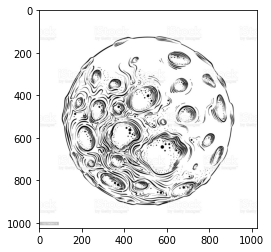

In [23]:
#@title Selecccione la imagen { run: "auto" }

letras = 'https://www.bakerross.ie/media/catalog/product/cache/789e0244c80348f78faf6f424fee0e0f/e/v/ev9035-new.jpg'
skymap ='https://previews.123rf.com/images/shooarts/shooarts1406/shooarts140600082/29384953-high-detailed-sky-map-of-northern-hemisphere-with-names-of-stars-and-constellations-colored-vector.jpg'
moon = 'https://media.istockphoto.com/vectors/hand-drawn-sketch-of-moon-planet-in-black-isolated-on-white-detailed-vector-id1027909474'
Imagen = 'moon' #@param ["letras", "skymap", "moon"]

if Imagen == 'letras':
  im = get_image(letras)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'skymap':
  im = get_image(skymap)
  plt.imshow(im, 'gray') 
  plt.show()
elif Imagen == 'moon':
  im = get_image(moon)
  plt.imshow(im, 'gray')
  plt.show()

## Plotteo de todos los filtros

In [24]:
 # Obtenemos la luminancia Y de la imagen

#Primero necesito los valores de R, G, B de las imágenes

R = get_R(im)/255
G = get_G(im)/255
B = get_B(im)/255

#Obtengo los valores de YIQ
Y = (0.299*R + 0.587*G + 0.114*B)
I = 0.595716*R + -0.274453*G + -0.321263*B
Q = 0.211456*R + -0.522591*G + 0.311135*B

Yorig = (0.299*R + 0.587*G + 0.114*B)

Y = np.array(np.clip(Y, 0, 1))

Yorig = np.array(np.clip(Yorig, 0, 1))

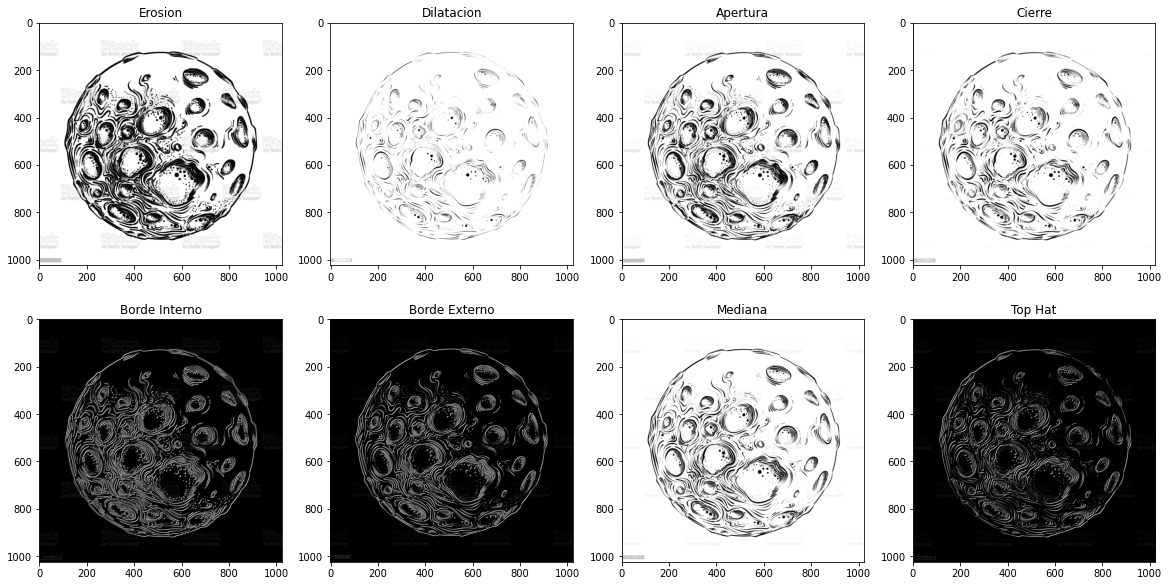

In [29]:
# Plot final con todos los filtros

x, z = Y.shape
Ypad = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

fig, ax = plt.subplots(2,4)
fig.set_size_inches(20,10)
ax[0,0].imshow(erosion(x, z, Ypad, Yorig), 'gray')
ax[0,0].set_title('Erosion')
ax[0,1].imshow(dilatacion(x, z, Ypad, Yorig), 'gray')
ax[0,1].set_title('Dilatacion')
ax[0,2].imshow(apertura(x, z, Ypad, Yorig), 'gray')
ax[0,2].set_title('Apertura')
ax[0,3].imshow(cierre(x, z, Ypad, Yorig), 'gray')
ax[0,3].set_title('Cierre')

ax[1,0].imshow(borde_interno(x, z, Ypad, Yorig), 'gray')
ax[1,0].set_title('Borde Interno')
ax[1,1].imshow(borde_externo(x, z, Ypad, Yorig), 'gray')
ax[1,1].set_title('Borde Externo')
ax[1,2].imshow(mediana(x, z, Ypad, Yorig), 'gray')
ax[1,2].set_title('Mediana')
ax[1,3].imshow(tophat(x, z, Ypad, Yorig), 'gray')
ax[1,3].set_title('Top Hat')

plt.show()

## Aplicativo

In [25]:
x, z = Y.shape

Ypad = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

#### Selección de Filtro

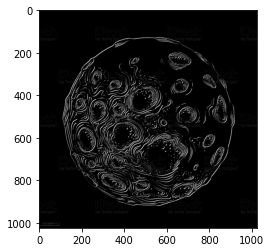

In [28]:
#@title Selecccione la imagen { run: "auto" }
erosion 
dilatacion 
apertura 
cierre 
borde_externo 
borde_interno
mediana 
tophat 
filtro = 'tophat' #@param ["erosion", "dilatacion", "apertura", "cierre", "borde_externo", "borde_interno", "mediana", "tophat"]

if filtro == 'erosion':
  erosion(x, z, Ypad, Yorig)
elif filtro == 'dilatacion':
  dilatacion(x, z, Ypad, Yorig)
elif filtro == 'apertura':
  apertura(x, z, Ypad, Yorig)
elif filtro == 'cierre':
  cierre(x, z, Ypad, Yorig)
elif filtro == 'borde_externo':
  borde_externo(x, z, Ypad, Yorig)
elif filtro == 'borde_interno':
  borde_interno(x, z, Ypad, Yorig)
elif filtro == 'mediana':
  mediana(x, z, Ypad, Yorig)
elif filtro == 'tophat':
  tophat(x, z, Ypad, Yorig)


### Selección de un 2do filtro para aplicar a la imagen resultante

Una vez corrida esta sección, se puede volver a correr eligiendo cualquier filtro, para aplicar multiples filtros a la imagen.

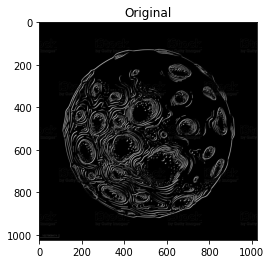

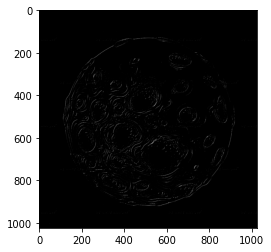

In [30]:
#Si quiere aplicarle otro filtro a la imagen resultante

#Imagen resultante:
im = io.imread('/content/drive/MyDrive/Imagenes PDI/filtered.bmp')
plt.title('Original')
plt.imshow(im, 'gray') 
plt.show()

# Obtenemos la luminancia Y de la imagen
#Primero necesito los valores de R, G, B de las imágenes

R = get_R(im)/255
G = get_G(im)/255
B = get_B(im)/255

#Obtengo los valores de YIQ
Y = (0.299*R + 0.587*G + 0.114*B)
Yorig = (0.299*R + 0.587*G + 0.114*B)

Y = np.array(np.clip(Y, 0, 1))
Yorig = np.array(np.clip(Yorig, 0, 1))

x, z = Y.shape
Ypad = np.pad(Y, [(1, 1), (1, 1)], mode='constant', constant_values=0)

#Seleccione un nuevo filtro
#@title Selecccione la imagen { run: "auto" }
erosion 
dilatacion 
apertura 
cierre 
borde_externo 
borde_interno
mediana 
tophat 
filtro = 'erosion' #@param ["erosion", "dilatacion", "apertura", "cierre", "borde_externo", "borde_interno", "mediana", "tophat"]

if filtro == 'erosion':
  erosion(x, z, Ypad, Yorig)
elif filtro == 'dilatacion':
  dilatacion(x, z, Ypad, Yorig)
elif filtro == 'apertura':
  apertura(x, z, Ypad, Yorig)
elif filtro == 'cierre':
  cierre(x, z, Ypad, Yorig)
elif filtro == 'borde_externo':
  borde_externo(x, z, Ypad, Yorig)
elif filtro == 'borde_interno':
  borde_interno(x, z, Ypad, Yorig)
elif filtro == 'mediana':
  mediana(x, z, Ypad, Yorig)
elif filtro == 'tophat':
  tophat(x, z, Ypad, Yorig)

## Conclusiones

Los filtros, y sobre todo usados en conjunto, resultan muy útiles para eliminar imperfecciones en imágenes, o también para resaltar las partes de mayor interés.
Esto se puede observar muy claramente si trabajamos con la imagen "moon" presentada dentro de las opciones de selección de imagen. 
Dicha imagen contiene marcas de agua creadas por su autor para evitar probablemente el plagio de la imagen. Sin embargo, podemos ver claramente que al aplicar el filtro de cierre, estas desaparecen por completo.

Por lo tanto, podemos asegurar su utilidad al momento de reducir  por ejemplo el ruido de una imagen. 

Por otro lado, resultan llamativos los nombres de erosión y dilatación. Intuitivamente uno diría que erosión vuelve los bordes en la imagen más finos, y lo opuesto sucede con dilatación. 
Sin embargo, esto puede no ser cierto si la imagen posee un fondo blanco y detalles en negro.
Nuevamente, si analizamos el caso de moon, vemos que en la imagen que recibió el filtro erosión la imagen presenta bordes más "gruesos" y definidos, y lo contrario sucede con la imagen con filtro de dilatación. 

Teniendo en cuenta lo mencionado anteriormente, los filtros de apertura y erosión/dilatación (dependiendo los colores de la imagen), son muy útiles al momento de resaltar las bajas frecuencias de la imagen. 
Esto puede resultar muy útil en el campo de la geología o geofísica, en la que muchas veces se analizan sismogramas, en los que las líneas por las que viajan las ondas generadas por choques, pueden no verse con gran definición, lo que dificulta su análisis.